In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
df = pd.read_csv("./Resources/train.csv")

df = df.drop("Unnamed: 0", axis=1)

df["label"] = df["label"].astype(str)

df["file_name"] = df["file_name"].str.replace("train_data/", "")

df.head()

,file_name,label
0,a6dcb93f596a43249135678dfcfc17ea.jpg,1
1,041be3153810433ab146bc97d5af505c.jpg,0
2,615df26ce9494e5db2f70e57ce7a3a4f.jpg,1
3,8542fe161d9147be8e835e50c0de39cd.jpg,0
4,5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1


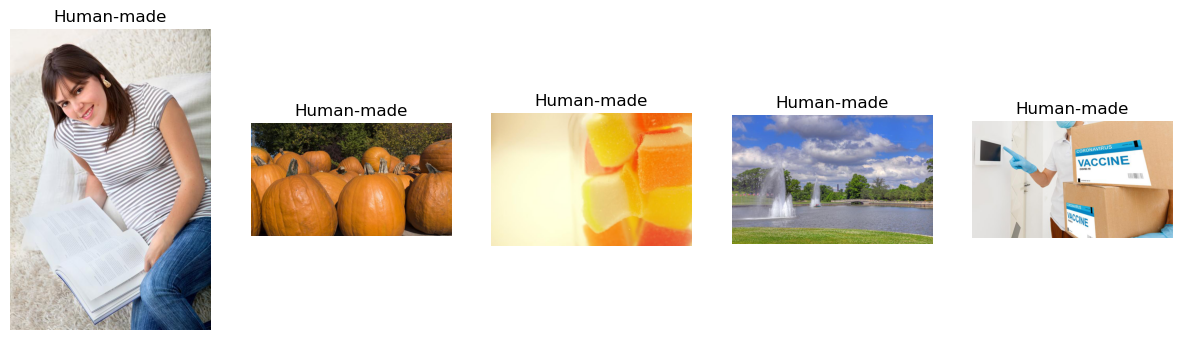

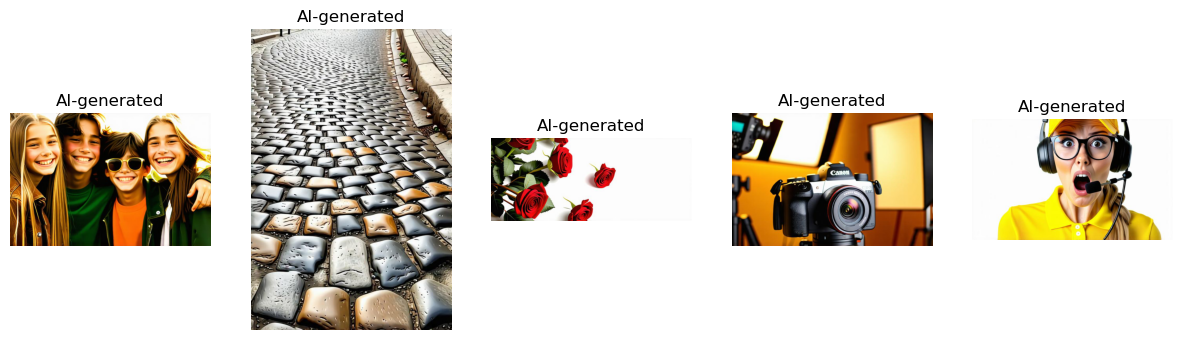

In [5]:
# Show examples
import matplotlib.image as mpimg

def image_examples(image, num_images=5):
    for j in range(2):
        example_image_path = f"./Resources/TrainingImages/{j}/"
        fig = plt.figure(figsize=(15, 5))
        for i in range(5):
            ax = fig.add_subplot(1, 5, i+1)
            img = mpimg.imread(f'{example_image_path}/{os.listdir(example_image_path)[i]}')
            ax.imshow(img)
            ax.axis("off")
            plt.title("Human-made" if j == 0
                      else "AI-generated")
        plt.show()
image_examples(image)

In [7]:
#Split testing and training data
train_image_path = "./Resources/TrainingImages/"
test_image_path = "./Resources/TestingImages/"
image_size = (255, 255)

y = np.array(df["label"])
X_train = tf.keras.utils.image_dataset_from_directory(
    train_image_path,
    labels="inferred",
    image_size=image_size,
    interpolation="bilinear"
)
X_test = tf.keras.utils.image_dataset_from_directory(
    test_image_path,
    labels="inferred",
    image_size=image_size,
    interpolation="bilinear"
)

Found 63960 files belonging to 2 classes.
Found 15990 files belonging to 2 classes.


In [7]:
# For model v5
# Redoing X_train and X_test with shuffle=False and class_mode = binary
train_image_path = "./Resources/TrainingImages/"
test_image_path = "./Resources/TestingImages/"
image_size = (255, 255)

y = np.array(df["label"])
X_train = tf.keras.utils.image_dataset_from_directory(
    train_image_path,
    labels="inferred",
    label_mode="binary",
    image_size=image_size,
    interpolation="bilinear",
    shuffle=False
)

X_test = tf.keras.utils.image_dataset_from_directory(
    test_image_path,
    labels="inferred",
    label_mode="binary",
    image_size=image_size,
    interpolation="bilinear",
    shuffle=False
)

Found 63960 files belonging to 2 classes.
Found 15990 files belonging to 2 classes.


In [9]:
#Rescale pixel values
rescale_layer = tf.keras.layers.Rescaling(1./255)
X_train = X_train.map(lambda x, y: (rescale_layer(x), y))
X_test = X_test.map(lambda x, y: (rescale_layer(x), y))

In [9]:
#SKIP
y_train = np.concatenate([y for x, y in X_train], axis=0)
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [11]:
#SKIP
y_test = np.concatenate([y for x, y in X_test], axis=0)
y_test

array([1, 1, 0, ..., 1, 0, 1])

In [11]:
#Added MaxPooling2D to the end
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

C:\Users\sicke\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
#Changed output to 1, sigmoid
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 253, 253, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,761 (1.06 MB)

 Trainable params: 277,761 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Model v5
#Changes loss to binary
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, epochs=3)

Epoch 1/3
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1090s 544ms/step - accuracy: 0.9952 - loss: 0.2529
Epoch 2/3
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1061s 530ms/step - accuracy: 0.9702 - loss: 28.5092
Epoch 3/3
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1073s 537ms/step - accuracy: 0.9501 - loss: 0.4296


In [17]:
# Model v4
#Changes loss to binary
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, epochs=10, validation_data=X_test)

Epoch 1/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1166s 582ms/step - accuracy: 0.8480 - loss: 0.3365 - val_accuracy: 0.9248 - val_loss: 0.1949
Epoch 2/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1172s 586ms/step - accuracy: 0.9264 - loss: 0.1942 - val_accuracy: 0.9154 - val_loss: 0.2397
Epoch 3/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1126s 563ms/step - accuracy: 0.9407 - loss: 0.1589 - val_accuracy: 0.9230 - val_loss: 0.1864
Epoch 4/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1124s 562ms/step - accuracy: 0.9497 - loss: 0.1329 - val_accuracy: 0.9521 - val_loss: 0.1319
Epoch 5/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1141s 571ms/step - accuracy: 0.9585 - loss: 0.1124 - val_accuracy: 0.9571 - val_loss: 0.1158
Epoch 6/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1124s 562ms/step - accuracy: 0.9635 - loss: 0.0992 - val_accuracy: 0.9569 - val_loss: 0.1158
Epoch 7/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1126s 563ms/step - accuracy: 0.9677 - loss: 0.0875 - val_accuracy: 0.9625 - val_loss: 0.1045
Epoch 8/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1129s 564ms/s

In [19]:
test_loss, test_accuracy = model.evaluate(X_test)

500/500 ━━━━━━━━━━━━━━━━━━━━ 72s 144ms/step - accuracy: 0.1548 - loss: 14.3843


In [21]:
history.history

{'accuracy': [0.8942620158195496,
  0.9297998547554016,
  0.9431988596916199,
  0.9525484442710876,
  0.9595059156417847,
  0.9648061394691467,
  0.9690119028091431,
  0.971591591835022,
  0.974812388420105,
  0.9781269431114197],
 'loss': [0.2598477900028229,
  0.18357610702514648,
  0.1510821282863617,
  0.12684980034828186,
  0.1100187823176384,
  0.09516873210668564,
  0.08356337249279022,
  0.07499081641435623,
  0.06614482402801514,
  0.05831599235534668],
 'val_accuracy': [0.9248279929161072,
  0.9154471755027771,
  0.9230144023895264,
  0.9520950317382812,
  0.9570981860160828,
  0.9569105505943298,
  0.9624765515327454,
  0.9630393981933594,
  0.9579737186431885,
  0.965228259563446],
 'val_loss': [0.19489113986492157,
  0.2397432029247284,
  0.18635913729667664,
  0.1319168657064438,
  0.11578644812107086,
  0.1158347949385643,
  0.10448363423347473,
  0.11008574813604355,
  0.12273834645748138,
  0.11732315272092819]}

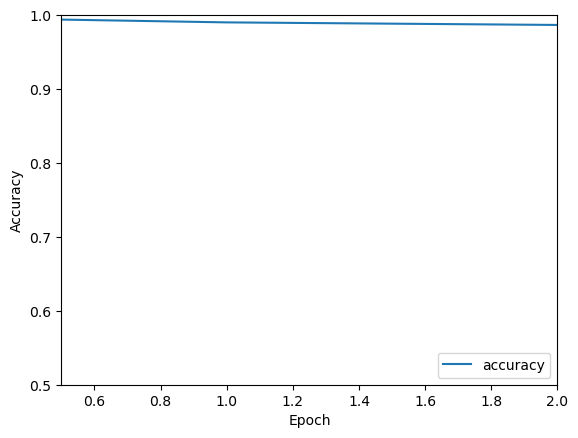

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.xlim([0.5, 2])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(train_generator)

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = np.concatenate([y for x, y in X_test], axis=0)
#y_prediction_prob = np.argmax(model.predict(X_test), axis=1)
y_prediction_prob = np.round(model.predict(X_test))



500/500 ━━━━━━━━━━━━━━━━━━━━ 67s 133ms/step


NameError: name 'y_prediction' is not defined

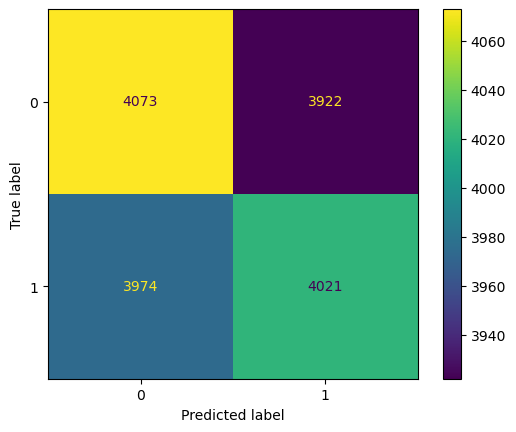

In [45]:
confusion_matrix_04 = confusion_matrix(y_true, y_prediction_prob)
show_cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_04)
show_cm.plot()
plt.show()

500/500 ━━━━━━━━━━━━━━━━━━━━ 66s 132ms/step


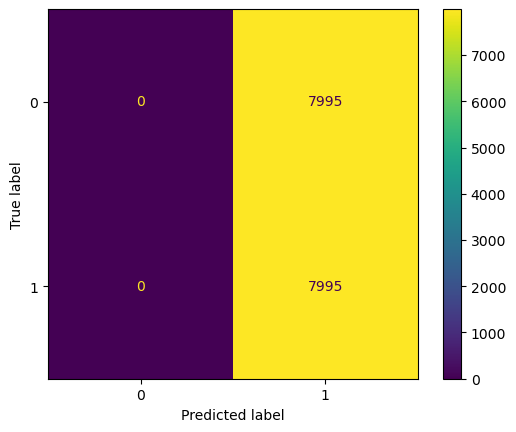

In [23]:
#For model v5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = np.concatenate([y for x, y in X_test], axis=0)
y_prediction = np.round(model.predict(X_test))
confusion_matrix_05 = confusion_matrix(y_true, y_prediction)
show_cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_04)
show_cm.plot()
plt.show()

500/500 ━━━━━━━━━━━━━━━━━━━━ 65s 129ms/step


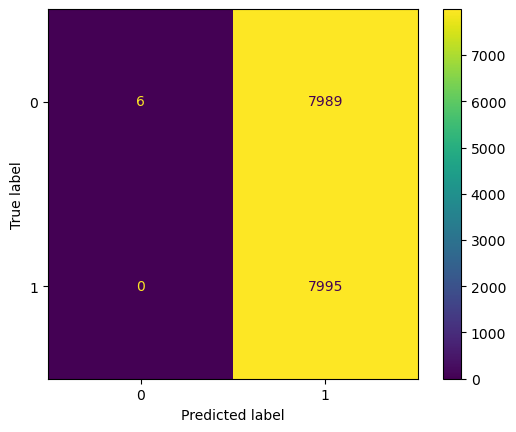

In [83]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# With X_test set to not shuffle and labels to binary
# For model v4
y_true = np.concatenate([y for x, y in X_test], axis=0)
y_prediction = np.round(model.predict(X_test))
confusion_matrix_04 = confusion_matrix(y_true, y_prediction)
show_cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_04)
show_cm.plot()
plt.show()

1999/1999 ━━━━━━━━━━━━━━━━━━━━ 269s 135ms/step


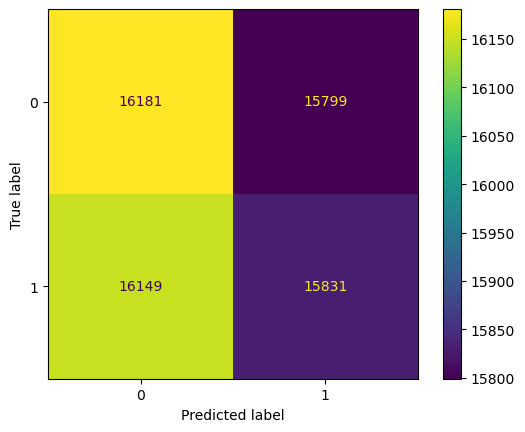

In [47]:
# A simple test looking at the training data for v4
y_true_train = np.concatenate([y for x, y in X_train], axis=0)
y_prediction_train = np.round(model.predict(X_train))
confusion_matrix_04_train = confusion_matrix(y_true_train, y_prediction_train)
show_cm_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_04_train)
show_cm_train.plot()
plt.show()

In [9]:
#For loading model
from tensorflow import keras
model = keras.models.load_model("./model_03.h5")
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 253, 253, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 720,196 (2.75 MB)

 Trainable params: 720,194 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [17]:
#results = model.evaluate(X_test)

500/500 ━━━━━━━━━━━━━━━━━━━━ 73s 146ms/step - accuracy: 0.9432 - loss: 0.1825


In [25]:
model.save("./model_04.h5")

Enter the url of the image to identify:  https://media.licdn.com/dms/image/D4E12AQGCw_UzwXEkhg/article-cover_image-shrink_720_1280/0/1715332701060?e=2147483647&v=beta&t=hCStWDsJ4xqSpBq5RGETzTZuiN6V7g2_WsZ-z4QLUZ8


255.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
real


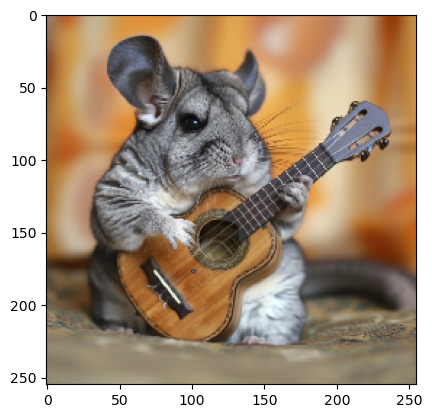

In [75]:
# Test images from url
import urllib.request
import io

image_size = (255, 255)
label = ["human", "ai"]

def predictImage(url):
    with urllib.request.urlopen(url) as rawdata:
        img = tf.keras.preprocessing.image.load_img(io.BytesIO(rawdata.read()), target_size=image_size)
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x[np.newaxis,:,:,:]
    print(np.max(x))
    plt.imshow(img)
    predictions = model.predict(x)
    #changed argmax to round
    prediction = np.round(predictions)
    print(label[prediction])

url = input("Enter the url of the image to identify: ")
predictImage(url)


255.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
human


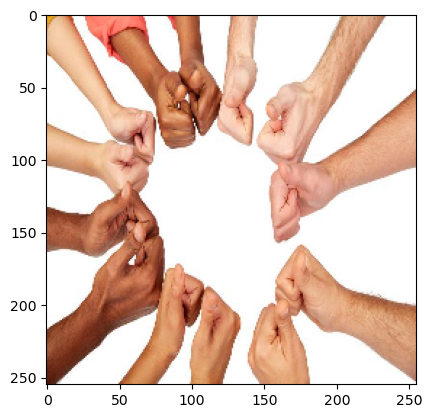

In [77]:
# Test images from file
image_size = (255, 255)
label = ["human", "ai"]
image_path = "./Resources/TrainingImages/0/"
image_name = "00a7657272904d2f81da11bb9f91c330.jpg"
image_to_predict = image_path+image_name

def predictImage(image_to_predict):
    test_df = pd.DataFrame({"file_name": [image_name]})
    img = tf.keras.preprocessing.image.load_img(image_to_predict, target_size=image_size)
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x[np.newaxis,:,:,:]
    print(np.max(x))
    plt.imshow(img)
    predictions = model.predict(x)
    prediction = np.argmax(predictions)
    print(label[prediction])

predictImage(image_to_predict)
